In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Loading the Datasets
operational_pc_df = pd.read_csv('OperationalPC.csv')
ev_cat_df = pd.read_csv('ev_cat_01-24.csv')
ev_sales_df = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
ev_maker_place_df = pd.read_csv('EV Maker by Place.csv')
vehicle_class_df = pd.read_csv('Vehicle Class - All.csv')

In [55]:
# Display the first few rows of each dataset
operational_pc_df.head(), ev_cat_df.head(), ev_sales_df.head(), ev_maker_place_df.head(), vehicle_class_df.head()

(               State  No. of Operational PCS
 0  Andaman & Nicobar                       3
 1     Andhra Pradesh                     327
 2  Arunachal Pradesh                       9
 3              Assam                      86
 4              Bihar                     124,
        Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
 0         0                                0                    0   
 1  01/01/01                                0                    1   
 2  01/01/02                                0                    2   
 3  01/01/03                                0                    1   
 4  01/01/04                                0                    2   
 
    HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
 0                    0                        0                    0   
 1                    0                        0                    9   
 2                    1                        0                  266   
 3       

In [56]:
# Convert 'Date' column in ev_cat_df to datetime
ev_cat_df['Date'] = pd.to_datetime(ev_cat_df['Date'], errors='coerce')

In [57]:
# Checking for null values
operational_pc_df.isnull().sum(), ev_cat_df.isnull().sum(), ev_sales_df.isnull().sum(), ev_maker_place_df.isnull().sum(), vehicle_class_df.isnull().sum()

(State                     0
 No. of Operational PCS    0
 dtype: int64,
 Date                               1
 FOUR WHEELER (INVALID CARRIAGE)    0
 HEAVY GOODS VEHICLE                0
 HEAVY MOTOR VEHICLE                0
 HEAVY PASSENGER VEHICLE            0
 LIGHT GOODS VEHICLE                0
 LIGHT MOTOR VEHICLE                0
 LIGHT PASSENGER VEHICLE            0
 MEDIUM GOODS VEHICLE               0
 MEDIUM PASSENGER VEHICLE           0
 MEDIUM MOTOR VEHICLE               0
 OTHER THAN MENTIONED ABOVE         0
 THREE WHEELER(NT)                  0
 TWO WHEELER (INVALID CARRIAGE)     0
 THREE WHEELER(T)                   0
 TWO WHEELER(NT)                    0
 TWO WHEELER(T)                     0
 dtype: int64,
 Cat      0
 Maker    0
 2015     0
 2016     0
 2017     0
 2018     0
 2019     0
 2020     0
 2021     0
 2022     0
 2023     0
 2024     0
 dtype: int64,
 EV Maker    0
 Place       0
 State       0
 dtype: int64,
 Vehicle Class         0
 Total Registration   

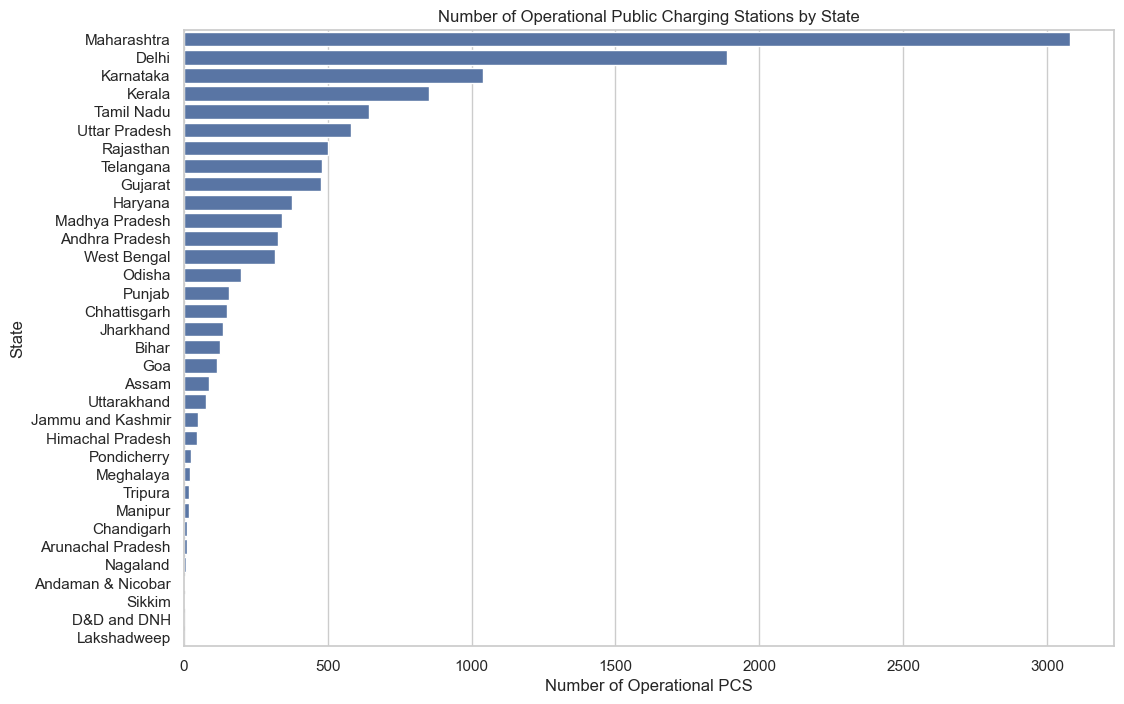

In [58]:
# Exploratory Data Analysis

# Plot the number of operational public charging stations by state
plt.figure(figsize=(12, 8))
sns.barplot(x='No. of Operational PCS', y='State', data=operational_pc_df.sort_values(by='No. of Operational PCS', ascending=False))
plt.title('Number of Operational Public Charging Stations by State')
plt.xlabel('Number of Operational PCS')
plt.ylabel('State')
plt.show()

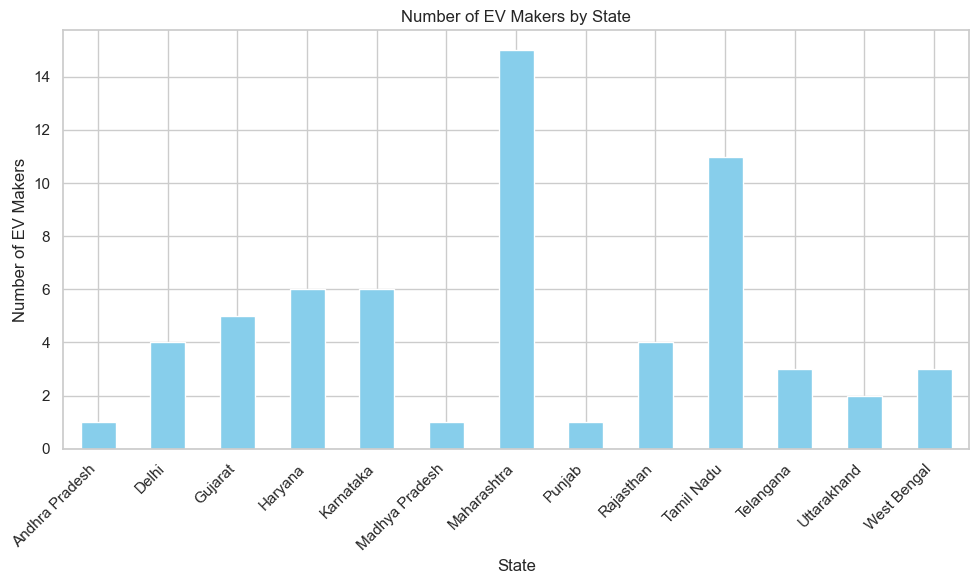

In [59]:
# Plot of EV Makers per state
ev_maker_by_place = ev_maker_place_df.groupby('State').size()

def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

create_bar_plot(ev_maker_by_place, 'Number of EV Makers by State', 'State', 'Number of EV Makers')

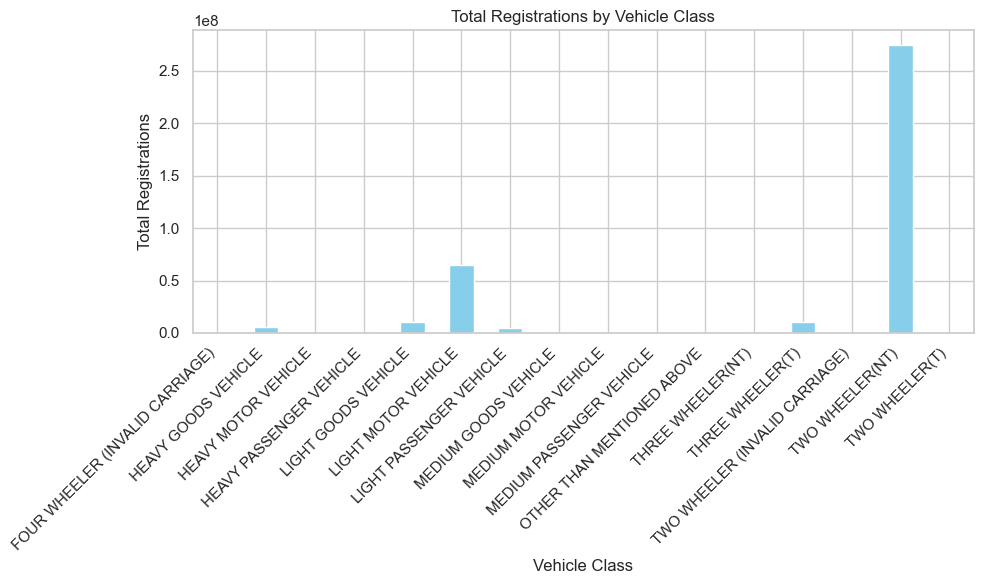

In [60]:
# Plot for total registrations by vehicle class
vehicle_class_all = vehicle_class_df.set_index('Vehicle Class')

# Clean the 'Total Registration' column by removing commas and converting to integers
vehicle_class_all['Total Registration'] = vehicle_class_all['Total Registration'].str.replace(',', '').astype(int)

def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

create_bar_plot(vehicle_class_all['Total Registration'], 'Total Registrations by Vehicle Class', 'Vehicle Class', 'Total Registrations')

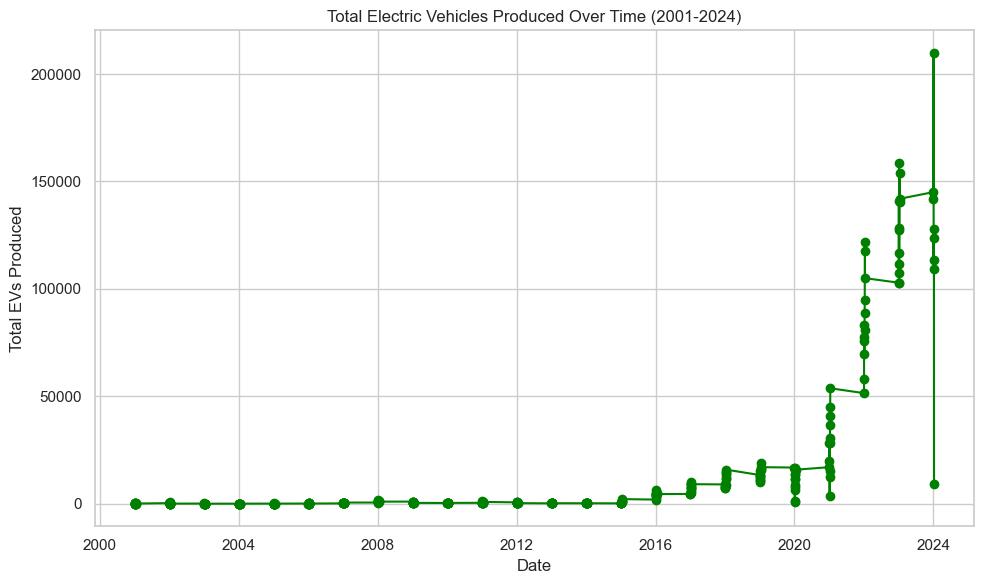

In [61]:
# List of relevant vehicle columns to sum
vehicle_columns = ['FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE', 'HEAVY MOTOR VEHICLE', 
                   'HEAVY PASSENGER VEHICLE', 'LIGHT GOODS VEHICLE', 'LIGHT MOTOR VEHICLE', 
                   'LIGHT PASSENGER VEHICLE', 'MEDIUM GOODS VEHICLE', 'MEDIUM PASSENGER VEHICLE', 
                   'MEDIUM MOTOR VEHICLE', 'OTHER THAN MENTIONED ABOVE', 'THREE WHEELER(NT)', 
                   'TWO WHEELER (INVALID CARRIAGE)', 'THREE WHEELER(T)', 'TWO WHEELER(NT)', 
                   'TWO WHEELER(T)']

# Sum the relevant vehicle columns to get total EVs produced
ev_cat_df['Total EVs Produced'] = ev_cat_df[vehicle_columns].sum(axis=1)

# Group data by Date and sum the 'Total EVs Produced' for each date
ev_cat_grouped = ev_cat_df.groupby('Date').sum()

plt.figure(figsize=(10, 6))
plt.plot(ev_cat_grouped.index, ev_cat_grouped['Total EVs Produced'], marker='o', linestyle='-', color='green')
plt.title('Total Electric Vehicles Produced Over Time (2001-2024)')
plt.xlabel('Date')
plt.ylabel('Total EVs Produced')
plt.grid(True)
plt.tight_layout()
plt.show()


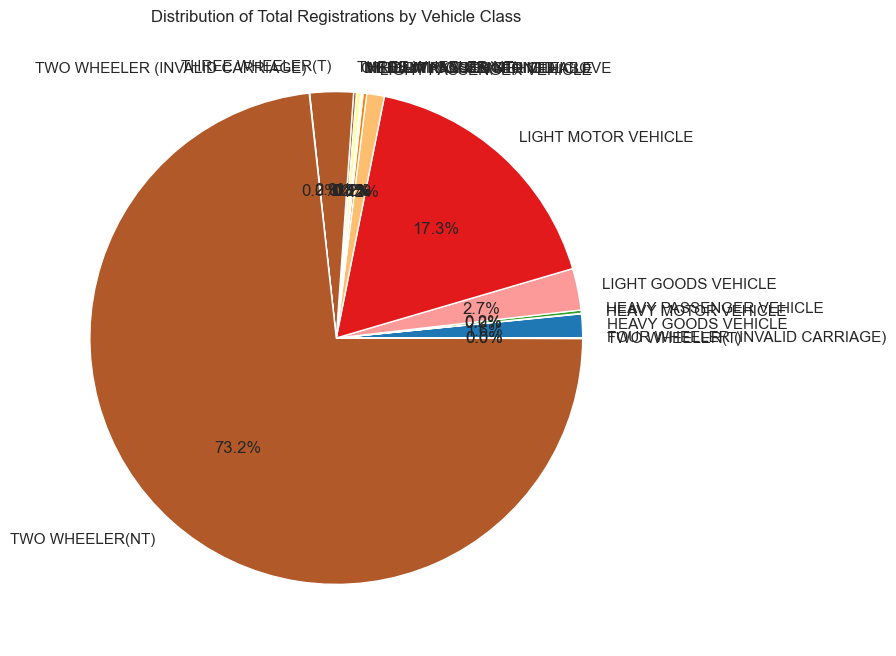

In [62]:
# Load the dataset
vehicle_class_df = pd.read_csv('Vehicle Class - All.csv')

# Ensure 'Total Registration' is numeric
vehicle_class_df['Total Registration'] = vehicle_class_df['Total Registration'].str.replace(',', '').astype(float)

# Drop any rows with missing values in 'Total Registration' or 'Vehicle Class'
vehicle_class_df = vehicle_class_df.dropna(subset=['Total Registration', 'Vehicle Class'])

# Ensure no negative values (if applicable)
vehicle_class_df = vehicle_class_df[vehicle_class_df['Total Registration'] >= 0]

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(vehicle_class_df['Total Registration'], labels=vehicle_class_df['Vehicle Class'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(vehicle_class_df))))
plt.title('Distribution of Total Registrations by Vehicle Class')
plt.show()



       Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   
3  01/01/03                                0                    1   
4  01/01/04                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1                    0                        0                    9   
2                    1                        0                  266   
3                    2                        0                   35   
4                    0                        1                   14   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0                     0   
1     

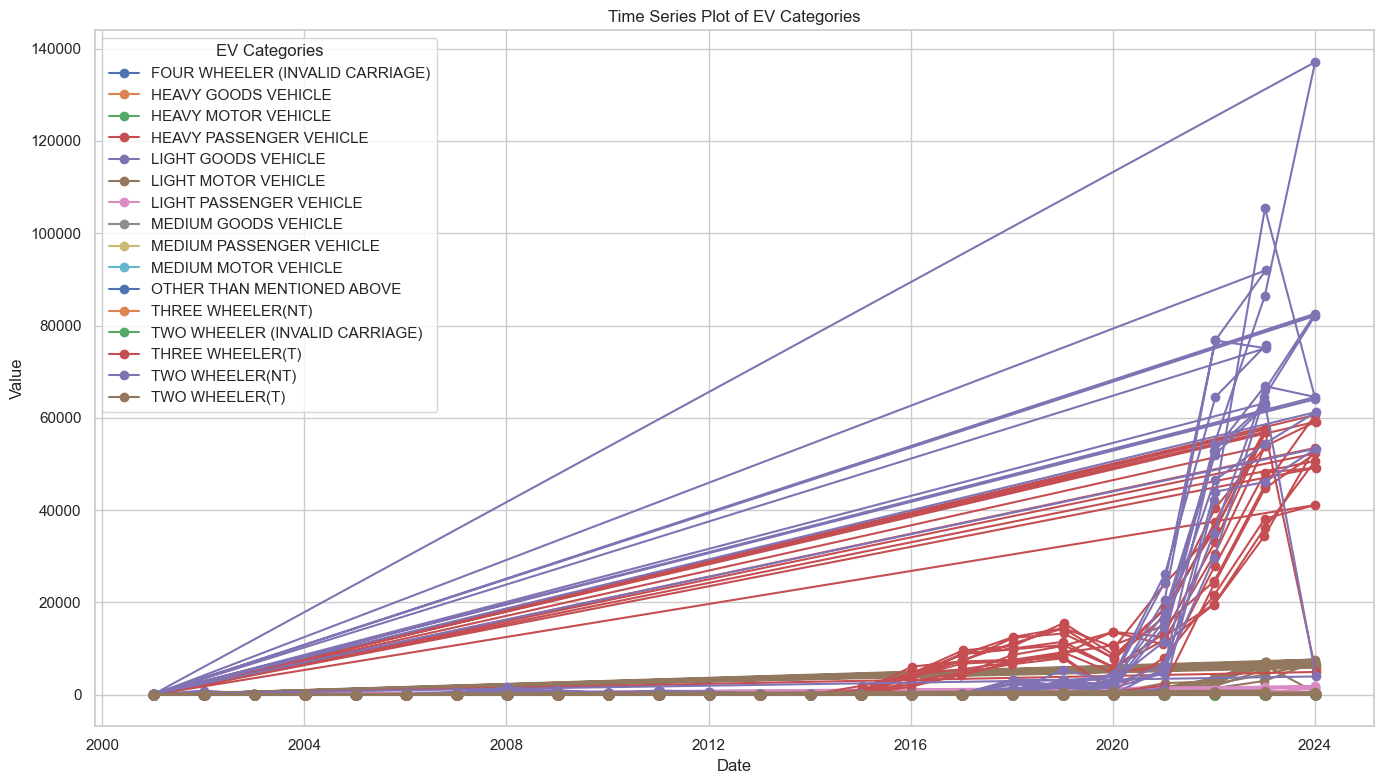

In [63]:
# Load the dataset
ev_cat_df = pd.read_csv('ev_cat_01-24.csv')

# Inspect the first few rows of the dataset
print(ev_cat_df.head())

# Check data types and ensure 'Date' is a datetime
print(ev_cat_df.dtypes)

# Convert 'Date' column to datetime format
ev_cat_df['Date'] = pd.to_datetime(ev_cat_df['Date'], errors='coerce')

# Drop any rows with NaT in the 'Date' column
ev_cat_df = ev_cat_df.dropna(subset=['Date'])

# Set 'Date' as the index
ev_cat_df.set_index('Date', inplace=True)

# Check if the DataFrame is not empty
if not ev_cat_df.empty:
    # Ensure columns are numeric
    numeric_columns = ev_cat_df.select_dtypes(include='number').columns
    print(f"Numeric columns for plotting: {numeric_columns}")

    # Plot the time series data for all numeric columns
    plt.figure(figsize=(14, 8))

    for column in numeric_columns:
        plt.plot(ev_cat_df.index, ev_cat_df[column], marker='o', linestyle='-', label=column)

    plt.title('Time Series Plot of EV Categories')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(title='EV Categories')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame is empty after cleaning.")


In [64]:
operational_pc_df.columns, ev_cat_df.columns, ev_sales_df.columns, ev_maker_place_df.columns, vehicle_class_df.columns

(Index(['State', 'No. of Operational PCS'], dtype='object'),
 Index(['FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE',
        'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE', 'LIGHT GOODS VEHICLE',
        'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE',
        'MEDIUM GOODS VEHICLE', 'MEDIUM PASSENGER VEHICLE',
        'MEDIUM MOTOR VEHICLE', 'OTHER THAN MENTIONED ABOVE',
        'THREE WHEELER(NT)', 'TWO WHEELER (INVALID CARRIAGE)',
        'THREE WHEELER(T)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)'],
       dtype='object'),
 Index(['Cat', 'Maker', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
        '2022', '2023', '2024'],
       dtype='object'),
 Index(['EV Maker', 'Place', 'State'], dtype='object'),
 Index(['Vehicle Class', 'Total Registration'], dtype='object'))

In [65]:
import pandas as pd

# Load the dataset
operational_pc_df = pd.read_csv('OperationalPC.csv')

# Clean and prepare data
operational_pc_df_clean = operational_pc_df[['State', 'No. of Operational PCS']].dropna()
operational_pc_df_clean = pd.get_dummies(operational_pc_df_clean, columns=['State'])

# Check the cleaned data
print(operational_pc_df_clean.head())


   No. of Operational PCS  State_Andaman & Nicobar  State_Andhra Pradesh  \
0                       3                     True                 False   
1                     327                    False                  True   
2                       9                    False                 False   
3                      86                    False                 False   
4                     124                    False                 False   

   State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  \
0                    False        False        False             False   
1                    False        False        False             False   
2                     True        False        False             False   
3                    False         True        False             False   
4                    False        False         True             False   

   State_Chhattisgarh  State_D&D and DNH  State_Delhi  ...  State_Pondicherry  \
0               F

In [66]:
# Load the dataset
ev_sales_df = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')

# Reshape data to have Year and Total Sales
ev_sales_df_melted = ev_sales_df.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Total Sales')
ev_sales_df_melted['Year'] = ev_sales_df_melted['Year'].astype(int)

# Check the reshaped data
print(ev_sales_df_melted.head())


  Cat                          Maker  Year  Total Sales
0  3W    "VOLVO GROUP INDIA PVT LTD"  2015            0
1  3W         3EV INDUSTRIES PVT LTD  2015            0
2  2W         3GB TECHNOLOGY PVT LTD  2015            0
3  3W         3GB TECHNOLOGY PVT LTD  2015            0
4  3W  3S INDUSTRIES PRIVATE LIMITED  2015            0


In [67]:
# Load the dataset
ev_maker_place_df = pd.read_csv('EV Maker by Place.csv')

# Count the number of EV Makers by State
ev_maker_place_df_clean = ev_maker_place_df.groupby('State').size().reset_index(name='Number of Makers')
ev_maker_place_df_clean = pd.get_dummies(ev_maker_place_df_clean, columns=['State'])

# Check the cleaned data
print(ev_maker_place_df_clean.head())


   Number of Makers  State_Andhra Pradesh  State_Delhi  State_Gujarat  \
0                 1                  True        False          False   
1                 4                 False         True          False   
2                 5                 False        False           True   
3                 6                 False        False          False   
4                 6                 False        False          False   

   State_Haryana  State_Karnataka  State_Madhya Pradesh  State_Maharashtra  \
0          False            False                 False              False   
1          False            False                 False              False   
2          False            False                 False              False   
3           True            False                 False              False   
4          False             True                 False              False   

   State_Punjab  State_Rajasthan  State_Tamil Nadu  State_Telangana  \
0         False      

In [68]:
# Load the dataset
vehicle_class_df = pd.read_csv('Vehicle Class - All.csv')

# Clean and prepare data
vehicle_class_df_clean = vehicle_class_df[['Vehicle Class', 'Total Registration']].dropna()
vehicle_class_df_clean = pd.get_dummies(vehicle_class_df_clean, columns=['Vehicle Class'])

# Check the cleaned data
print(vehicle_class_df_clean.head())


  Total Registration  Vehicle Class_FOUR WHEELER (INVALID CARRIAGE)  \
0             21,346                                           True   
1          58,70,865                                          False   
2           1,02,965                                          False   
3           8,28,189                                          False   
4        1,02,49,591                                          False   

   Vehicle Class_HEAVY GOODS VEHICLE  Vehicle Class_HEAVY MOTOR VEHICLE  \
0                              False                              False   
1                               True                              False   
2                              False                               True   
3                              False                              False   
4                              False                              False   

   Vehicle Class_HEAVY PASSENGER VEHICLE  Vehicle Class_LIGHT GOODS VEHICLE  \
0                                  False   

In [69]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Segment Extraction
# Load datasets
operational_pc_df = pd.read_csv('OperationalPC.csv')
ev_sales_df = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
ev_maker_place_df = pd.read_csv('EV Maker by Place.csv')
vehicle_class_df = pd.read_csv('Vehicle Class - All.csv')

# Prepare OperationalPC Data
operational_pc_df_clean = operational_pc_df[['State', 'No. of Operational PCS']].dropna()
operational_pc_df_clean = pd.get_dummies(operational_pc_df_clean, columns=['State'])

# Prepare EV Sales Data
ev_sales_df_clean = ev_sales_df.dropna()
# Aggregate sales data and prepare for clustering (you may need to adjust this based on actual columns)
ev_sales_df_clean = ev_sales_df_clean.groupby(['Cat', 'Maker']).sum().reset_index()
ev_sales_df_melted = ev_sales_df_clean.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Total Sales')

# Prepare EV Maker by Place Data
ev_maker_place_df_clean = ev_maker_place_df.groupby('State').size().reset_index(name='Number of Makers')
ev_maker_place_df_clean = pd.get_dummies(ev_maker_place_df_clean, columns=['State'])

# Prepare Vehicle Class Data
vehicle_class_df_clean = vehicle_class_df[['Vehicle Class', 'Total Registration']].dropna()
vehicle_class_df_clean = pd.get_dummies(vehicle_class_df_clean, columns=['Vehicle Class'])

# Concatenate all cleaned data into a single DataFrame for clustering
combined_df = pd.concat([
    operational_pc_df_clean,
    ev_sales_df_melted,
    ev_maker_place_df_clean,
    vehicle_class_df_clean
], axis=1)

# Drop any non-numeric columns (if necessary)
combined_df = combined_df.select_dtypes(include=[float, int])

# Ensure there are no NaN values
combined_df = combined_df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
combined_df['Cluster'] = clusters

# Inspect the clustered data
print(combined_df.head())


   No. of Operational PCS  Total Sales  Number of Makers  Cluster
0                     3.0            0               1.0        2
1                   327.0            0               4.0        0
2                     9.0            0               5.0        0
3                    86.0            0               6.0        0
4                   124.0            0               6.0        0


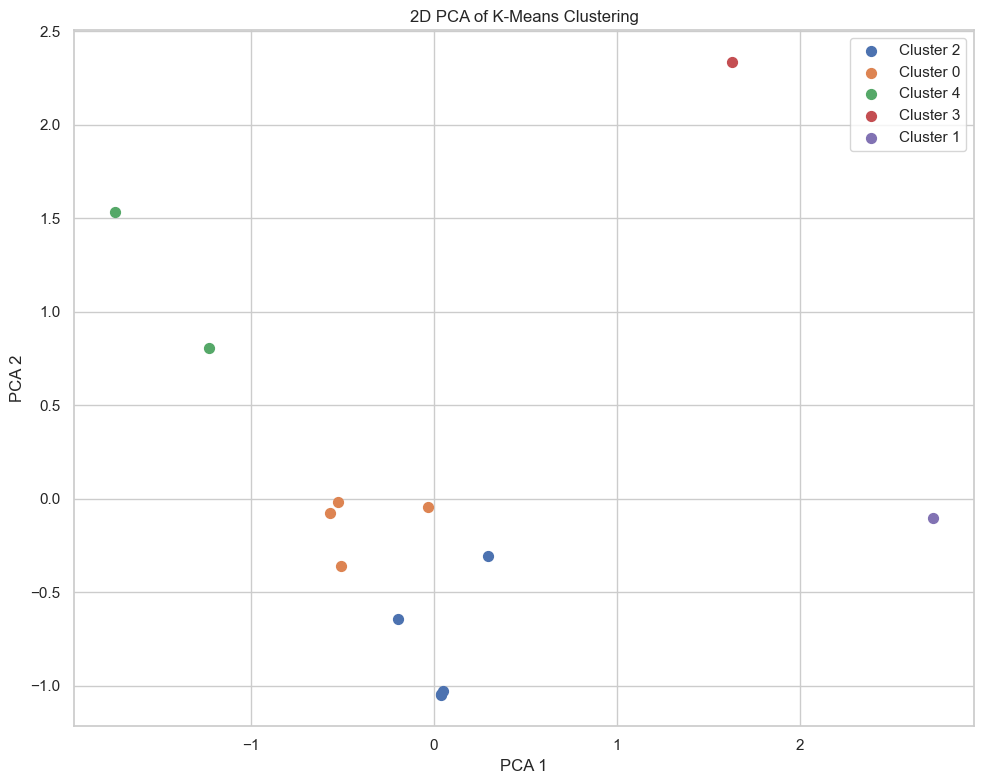

In [70]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the PCA results
plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', s=50)

plt.title('2D PCA of K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


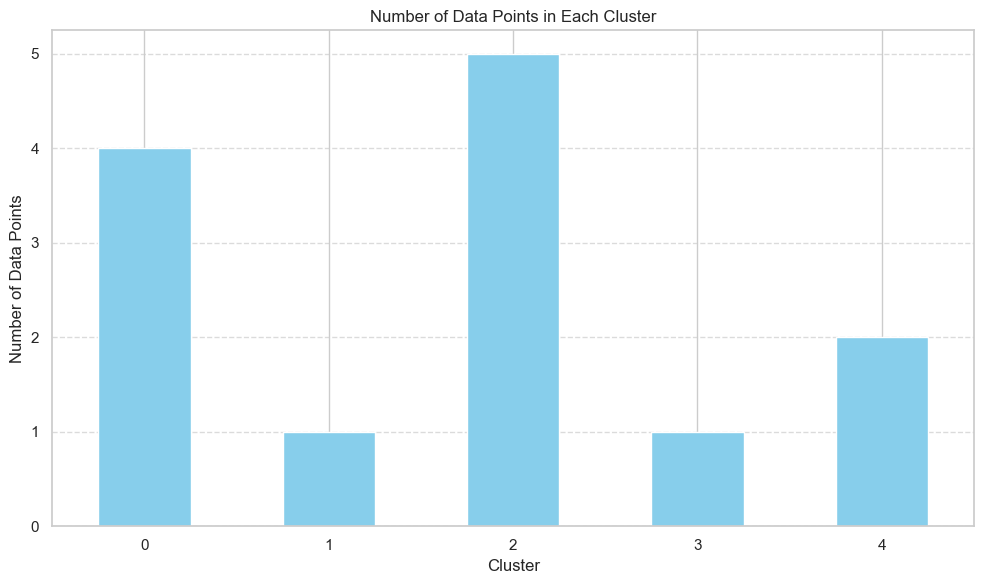

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df and clusters are already defined as in your provided code

# Add cluster labels to the combined_df
combined_df['Cluster'] = clusters

# Count the number of data points in each cluster
cluster_counts = combined_df['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


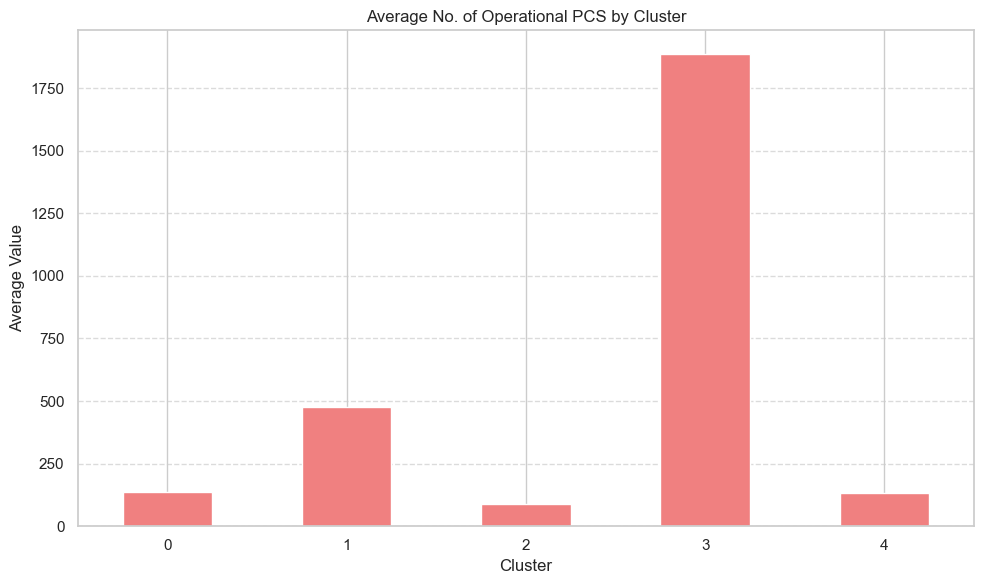

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Add cluster labels to the combined_df
combined_df['Cluster'] = clusters

# Calculate the mean of each feature for each cluster
cluster_means = combined_df.groupby('Cluster').mean()

# Plot the bar chart for a specific feature (e.g., 'No. of Operational PCS')
feature_to_plot = 'No. of Operational PCS'  # Change this to any feature you're interested in
if feature_to_plot in cluster_means.columns:
    plt.figure(figsize=(10, 6))
    cluster_means[feature_to_plot].plot(kind='bar', color='lightcoral')
    plt.title(f'Average {feature_to_plot} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"The feature '{feature_to_plot}' is not in the DataFrame.")


In [73]:
# CLUSTERING
# Assuming combined_df with cluster labels is available
segment_summary = combined_df.groupby('Cluster').mean()  # or use .describe() for detailed stats
print(segment_summary)


         No. of Operational PCS  Total Sales  Number of Makers
Cluster                                                       
0                         136.5          0.0              5.25
1                         476.0         31.0              3.00
2                          87.4          0.0              1.60
3                        1886.0          0.0              4.00
4                         131.0          0.0             13.00


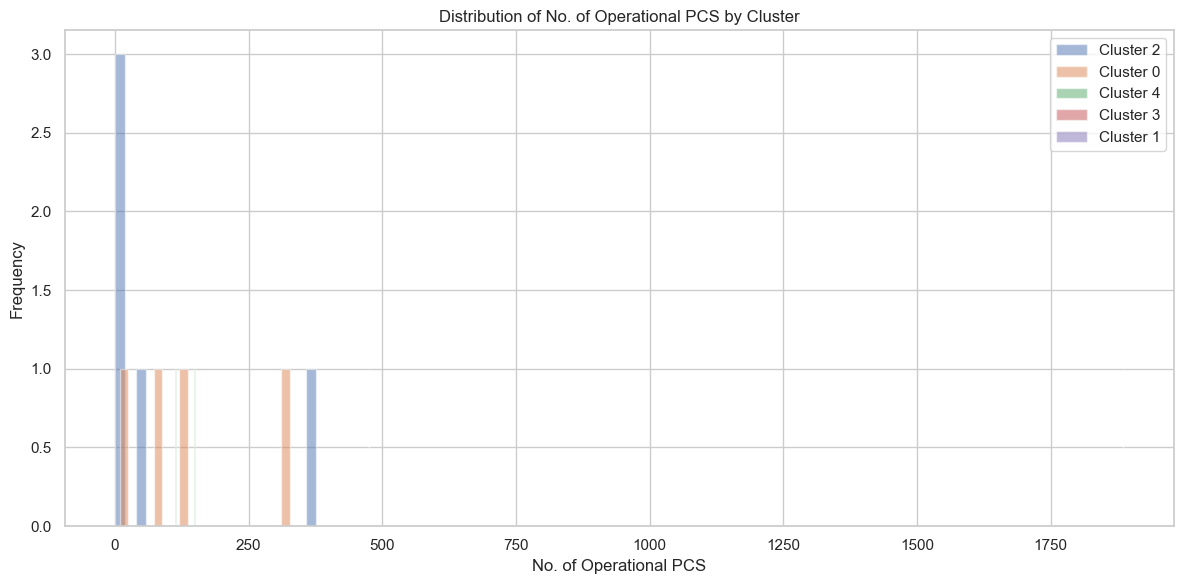

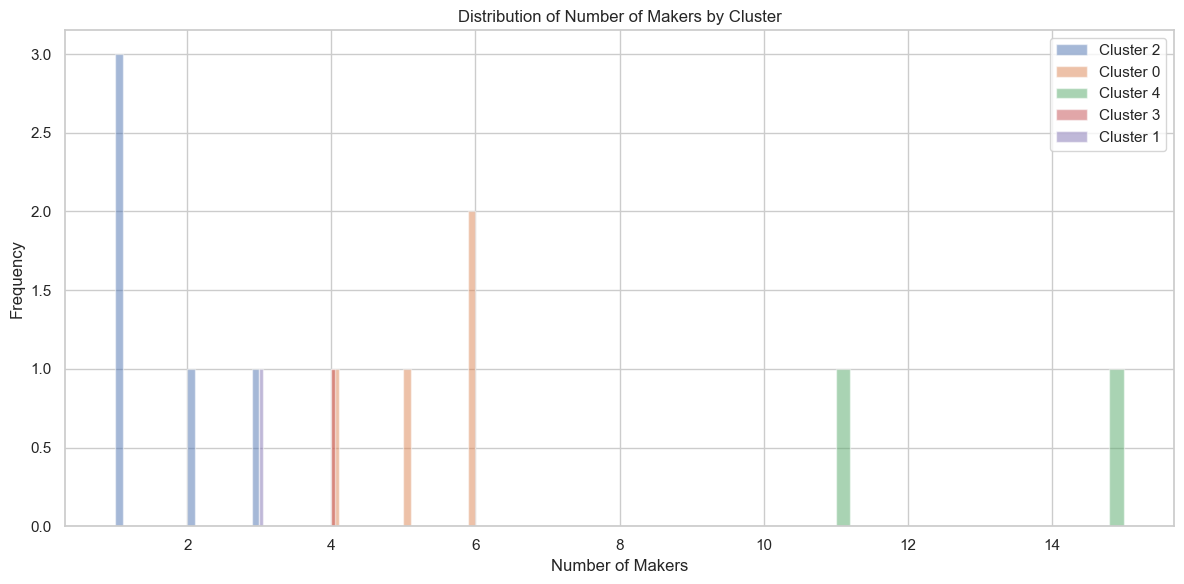

In [74]:

features_to_plot = ['No. of Operational PCS', 'Number of Makers']  # Add other relevant features

for feature in features_to_plot:
    plt.figure(figsize=(12, 6))
    for cluster in combined_df['Cluster'].unique():
        subset = combined_df[combined_df['Cluster'] == cluster]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [75]:
# Profiling of each cluster
for cluster in combined_df['Cluster'].unique():
    print(f"Cluster {cluster} Summary:")
    cluster_data = combined_df[combined_df['Cluster'] == cluster]
    print(cluster_data.describe())

Cluster 2 Summary:
       No. of Operational PCS  Total Sales  Number of Makers  Cluster
count                5.000000          5.0          5.000000      5.0
mean                87.400000          0.0          1.600000      2.0
std                162.807555          0.0          0.894427      0.0
min                  1.000000          0.0          1.000000      2.0
25%                  3.000000          0.0          1.000000      2.0
50%                 12.000000          0.0          1.000000      2.0
75%                 44.000000          0.0          2.000000      2.0
max                377.000000          0.0          3.000000      2.0
Cluster 0 Summary:
       No. of Operational PCS  Total Sales  Number of Makers  Cluster
count                4.000000          4.0          4.000000      4.0
mean               136.500000          0.0          5.250000      0.0
std                135.711704          0.0          0.957427      0.0
min                  9.000000          0.0          

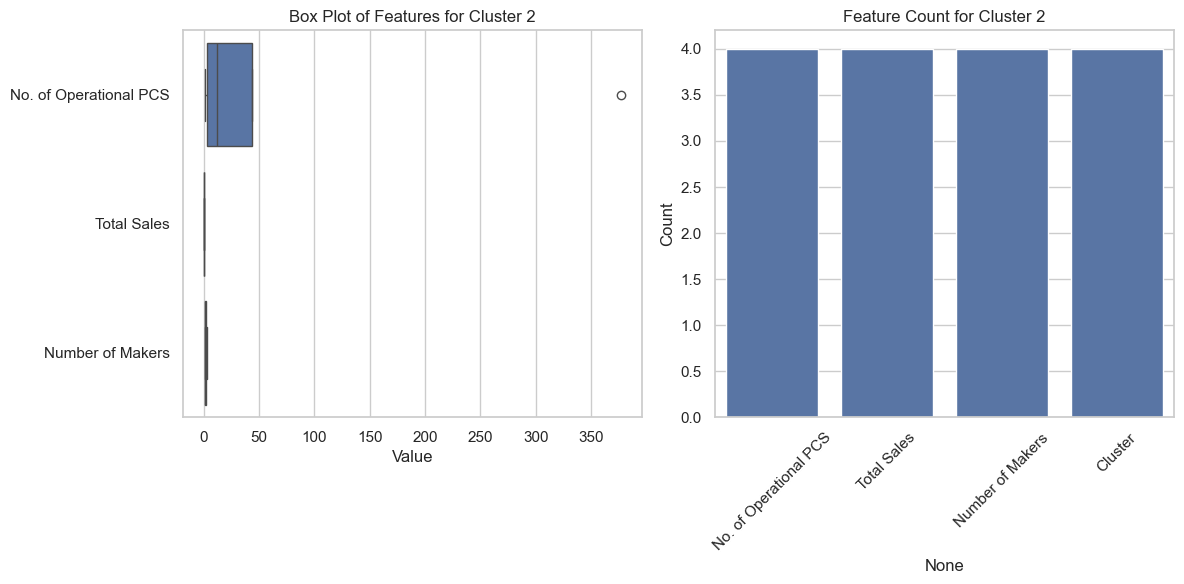

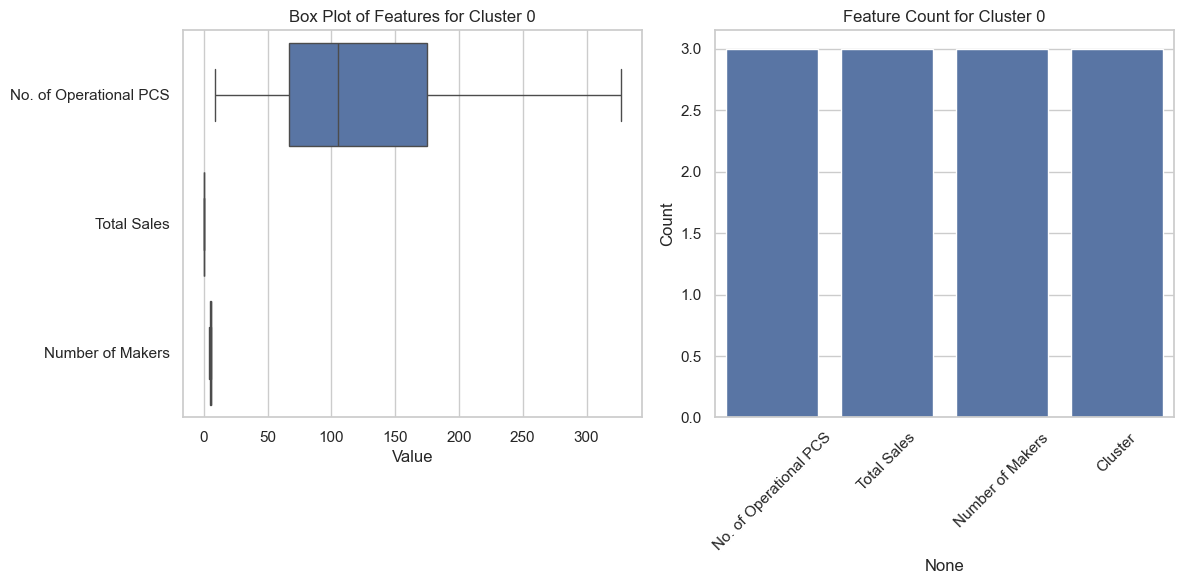

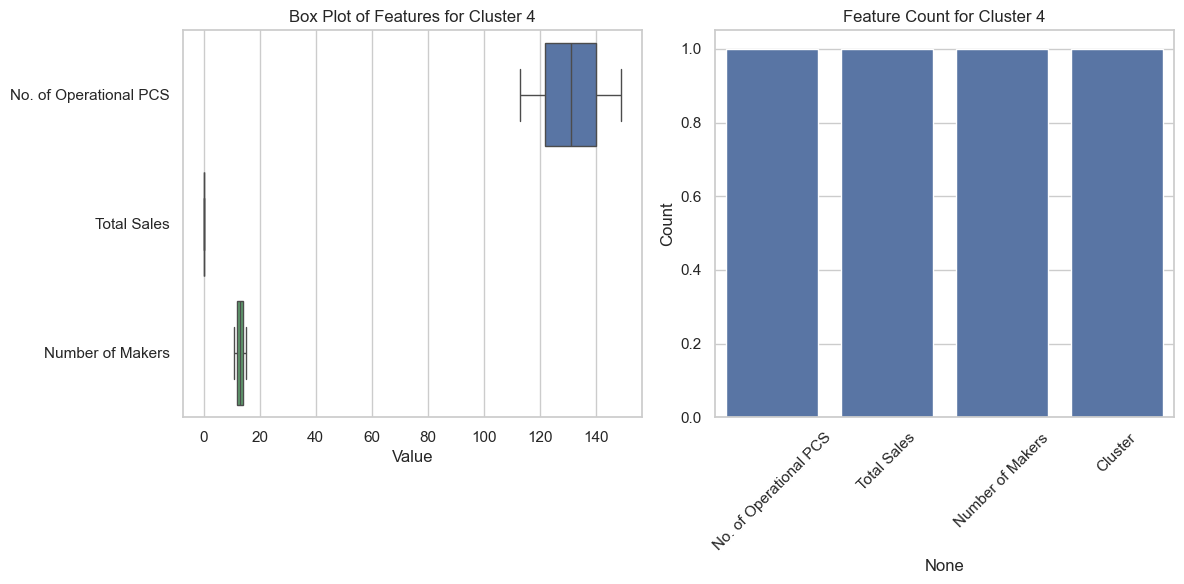

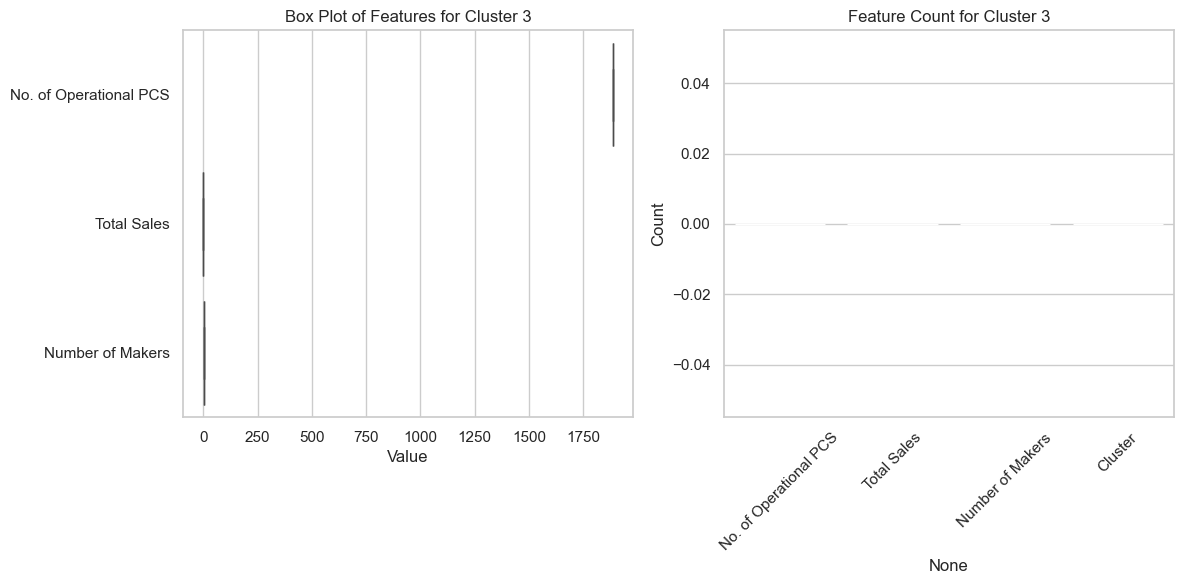

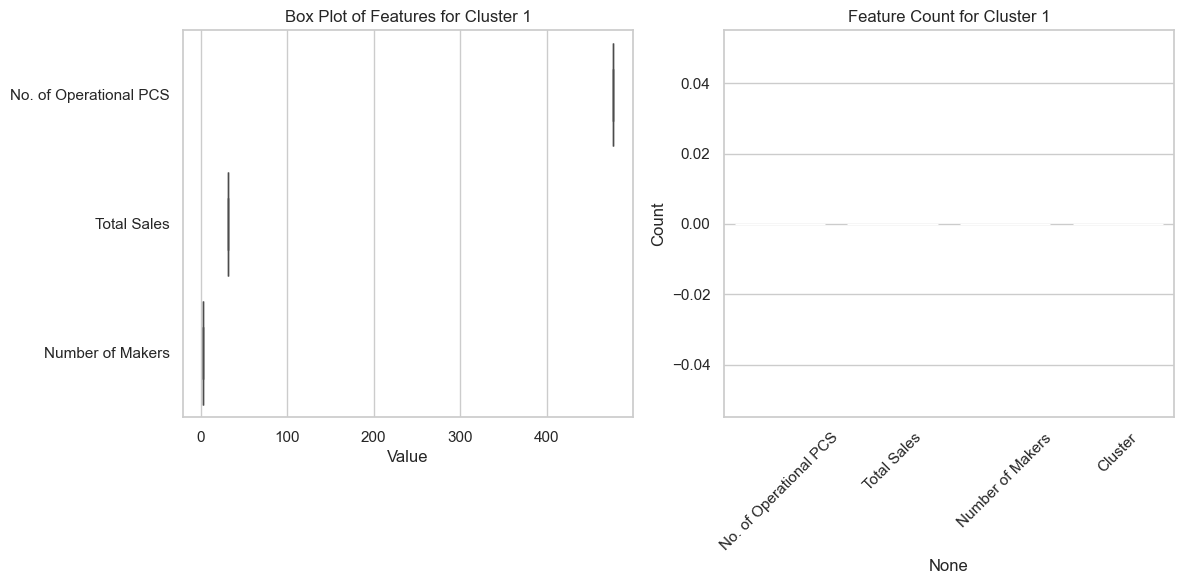

In [76]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Iterate through each cluster and visualize the distributions
for cluster in combined_df['Cluster'].unique():
    cluster_data = combined_df[combined_df['Cluster'] == cluster]
    
    # Create a figure with subplots
    plt.figure(figsize=(12, 6))
    
    # Box plot for each numeric feature in the cluster
    plt.subplot(1, 2, 1)
    sns.boxplot(data=cluster_data.drop(columns=['Cluster']), orient='h')
    plt.title(f'Box Plot of Features for Cluster {cluster}')
    plt.xlabel('Value')
    
    # Bar plot for the count of each feature in the cluster
    plt.subplot(1, 2, 2)
    cluster_counts = cluster_data.count() - 1  # Exclude the Cluster column
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title(f'Feature Count for Cluster {cluster}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


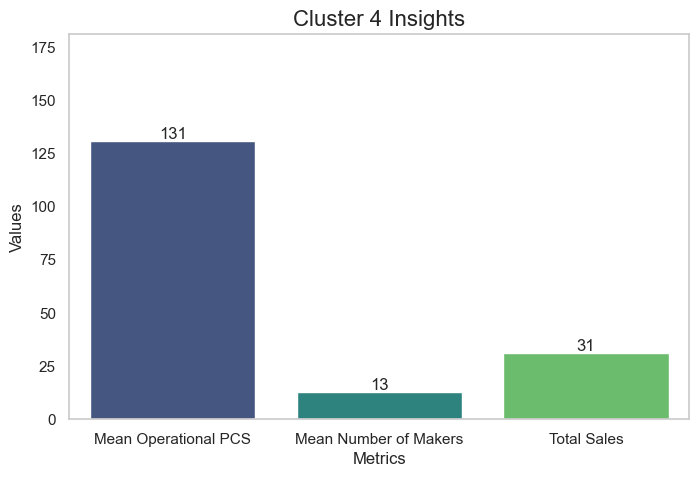

In [77]:
# Choosing Cluster 4 as the Target Segment
# Data for Cluster 4
categories = ['Mean Operational PCS', 'Mean Number of Makers', 'Total Sales']
values = [131, 13, 31]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette='viridis')

# Adding titles and labels
plt.title('Cluster 4 Insights', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, max(values) + 50)  # Set y-axis limit for better visualization

# Annotate the bars with the values
for index, value in enumerate(values):
    plt.text(index, value + 1, str(value), ha='center')

# Show the plot
plt.grid(axis='y')
plt.show()
